In [2]:
import matplotlib.pyplot as plt
import time
import diskchef.uv.galariochef
from diskchef.model.model import Model
from pathlib import Path
import astropy.table
from diskchef.lamda.line import Line
from diskchef.physics.yorke_bodenheimer import YorkeBodenheimer2008
from diskchef.uv.galariochef import Residual
from diskchef.uv.uvfits_to_visibilities_ascii import UVFits
from astropy import units as u
import numpy as np
import emcee
from spectral_cube import SpectralCube
from matplotlib import pyplot as plt
from astropy import constants as c

In [3]:
model_reference_path = Path("Default") / "radmc_gas"
model_comparison_paths = Path("fit2").glob("fit_*/radmc_gas")

print(model_reference_path)
print(list(model_comparison_paths))


def residual(folder1: Path, folder2: Path):
    data1 = Residual(folder1)
    data2 = Residual()
    return 0

# cube = SpectralCube(model_reference_path)
# vis = sampleImage(image, dxy, u, v)

Default/radmc_gas
[PosixPath('fit2/fit_037sr90z/radmc_gas'), PosixPath('fit2/fit_4jpoykk3/radmc_gas'), PosixPath('fit2/fit_4ud0nmq3/radmc_gas'), PosixPath('fit2/fit_53tf8unb/radmc_gas'), PosixPath('fit2/fit_5yhdu0ur/radmc_gas'), PosixPath('fit2/fit_6a4hoh3e/radmc_gas'), PosixPath('fit2/fit_6gc6vffy/radmc_gas'), PosixPath('fit2/fit_6mmt48ow/radmc_gas'), PosixPath('fit2/fit_915hvr7g/radmc_gas'), PosixPath('fit2/fit_c2y5emo1/radmc_gas'), PosixPath('fit2/fit_cjj2jt9e/radmc_gas'), PosixPath('fit2/fit_cy7qp6li/radmc_gas'), PosixPath('fit2/fit_eet_lgsk/radmc_gas'), PosixPath('fit2/fit_f27lj41j/radmc_gas'), PosixPath('fit2/fit_fj_ym7_f/radmc_gas'), PosixPath('fit2/fit_g4zyvhot/radmc_gas'), PosixPath('fit2/fit_ggfadu2b/radmc_gas'), PosixPath('fit2/fit_hndq6ekd/radmc_gas'), PosixPath('fit2/fit_l75m9a86/radmc_gas'), PosixPath('fit2/fit_mmwh9e7o/radmc_gas'), PosixPath('fit2/fit_mynq7i3x/radmc_gas'), PosixPath('fit2/fit_n0tnvfk0/radmc_gas'), PosixPath('fit2/fit_q9bnmgss/radmc_gas'), PosixPath('fit2

### Get UV coordinates of a real uvfits file from PRODIGE

In [7]:
uvdata = UVFits("s-Line-22-CO_1+D.uvfits", 'all', sum=False)
print(uvdata)
import pickle

with open("uv_example.pkl", "wb") as uvpkl:
    pickle.dump((uvdata.u, uvdata.v), uvpkl)

In [9]:
uvdata._fits

UU,VV,WW,BASELINE,DATE,_DATE,"DATA [1,1,1,493,1,3]"
float64,float64,float64,float32,float64,float32,float32
3.608654175342887e-07,-2.562443695449547e-07,0.0,258.0,2458935.0,0.2416609,1.6668814 .. 12.147211
-9.496364697439727e-08,2.1476601328668404e-07,0.0,259.0,2458935.0,0.2416609,-1.5866691 .. 13.300214
-4.558283455766723e-07,4.710114771352347e-07,0.0,515.0,2458935.0,0.2416609,-0.9555985 .. 16.72856
-1.0426352246272154e-07,-2.6824748030245487e-07,0.0,260.0,2458935.0,0.2416609,1.4829572 .. 6.979889
-4.651289081858592e-07,-1.2002890465279234e-08,0.0,516.0,2458935.0,0.2416609,1.1320401 .. 8.741062
-9.30202910325012e-09,-4.830132390999305e-07,0.0,772.0,2458935.0,0.2416609,0.50581056 .. 9.555363
-4.4698703419291477e-07,-2.770917692099504e-07,0.0,261.0,2458935.0,0.24218172,0.48273578 .. 10.562128
-8.078524262782827e-07,-2.0847444200607244e-08,0.0,517.0,2458935.0,0.24218172,-0.5911419 .. 13.253791
-3.520263965534065e-07,-4.918562301124634e-07,0.0,773.0,2458935.0,0.24270254,0.35708475 .. 14.50576


### Transform reference model to UV coordinates as in PRODIGE

pixel area:  1.4938272112695288e-10 deg2
pixel size:  2.1331802331357243e-07 rad


SpectralCube with shape=(101, 100, 100) and unit=Jy:
 n_x:    100  type_x: RA---TAN  unit_x: deg    range:     0.000617 deg:  359.999407 deg
 n_y:    100  type_y: DEC--TAN  unit_y: deg    range:    -0.000605 deg:    0.000605 deg
 n_s:    101  type_s: FREQ      unit_s: Hz     range: 230532232559.006 Hz:230543767439.734 Hz
U:  [ 108.18473053  -28.46938515 -136.65390015 ...    9.06657219  119.42552185
  -73.6292038 ] m
V:  [-76.82012939  64.38523102 141.20568848 ... -21.58722115 124.41912079
 122.06488037] m


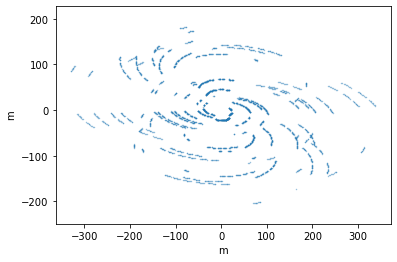

In [4]:
from galario.double import sampleImage

cube = SpectralCube.read(model_reference_path / "CO J=2-1_image.fits")
pixel_area_units = u.Unit(cube.wcs.celestial.world_axis_units[0]) * u.Unit(cube.wcs.celestial.world_axis_units[1])
pixel_area = astropy.wcs.utils.proj_plane_pixel_area(cube.wcs.celestial) * pixel_area_units
print("pixel area: ", pixel_area)
dxy = np.sqrt(pixel_area).to_value(u.rad)
print("pixel size: ", dxy, "rad")
cube = (cube * pixel_area).to(u.Jy)
print(cube)
with open("uv_example.pkl", "rb") as uvpkl:
    _u, _v = pickle.load(uvpkl)
print("U: ", _u)
print("V: ", _v)
plt.axis('equal')
plt.scatter(_u, _v, alpha=0.5, s=0.2)

In [5]:
%%time
visibilities = []
for i, frequency in enumerate(cube.spectral_axis):
    wl = (c.c / frequency).si
    u_wavelengths = (_u / wl).si
    v_wavelengths = (_v / wl).si
    vis = sampleImage(cube[i], dxy, u_wavelengths, v_wavelengths)
    visibilities.append(vis)
visibilities = np.array(visibilities)

CPU times: user 25.1 s, sys: 1.09 s, total: 26.2 s
Wall time: 3.3 s


In [ ]:
visibilities_real_imag_weight = np.array([visibilities.real, visibilities.imag, np.ones_like(visibilities.imag)])
uvdata_arr = visibilities_real_imag_weight.T.reshape(visibilities.shape[1], 1, 1, 1, visibilities.shape[0], 1, 3)
uvdata.set_data(uvdata_arr, cube.spectral_axis)

In [10]:
uvdata = UVFits("s-Line-22-CO_1+D.uvfits", 'all', sum=False)

In [11]:
uvdata.image_to_visibilities(model_reference_path / "CO J=2-1_image.fits")

In [12]:
uvdata.table

u,v,Re [101],Im [101],Weight [101]
m,m,Jy,Jy,1 / Jy2
float64,float64,float64,float64,float64
108.18473052980072,-76.8201293945423,0.002595382865316288 .. 0.002611558298141947,0.000234557696255306 .. -0.00014513840110963287,1.0 .. 1.0
-28.46938514709882,64.38523101807567,0.002607506291065857 .. 0.0026133253060564763,-6.183750302686385e-05 .. 0.0001573316731323056,1.0 .. 1.0
-136.65390014650401,141.2056884765828,0.002587595634889095 .. 0.0025964924443564103,-0.00029589614947032243 .. 0.00030169773871004276,1.0 .. 1.0
-31.257417678837502,-80.41857147217954,0.0026073191178509567 .. 0.0026074860281282064,-6.789345485648941e-05 .. -0.00023458896297582515,1.0 .. 1.0
-139.44213867189504,-3.5983760356908254,0.0025867199509721542 .. 0.0026122376912823533,-0.00030188876969263883 .. -8.9315309329805e-05,1.0 .. 1.0
-2.7886781692508893,-144.8037261963099,0.002608568647200264 .. 0.0025890740584526093,-6.055669083933621e-06 .. -0.0003909284821968134,1.0 .. 1.0
-134.00334167482396,-83.07002258301975,0.002588415065700358 .. 0.002596909887987901,-0.0002901984570098029 .. -0.0002997236739480896,1.0 .. 1.0
-242.18806457523016,-6.249906539917891,0.00254325553019449 .. 0.00260026049742509,-0.0005207722161572609 .. -0.0001541432070003192,1.0 .. 1.0


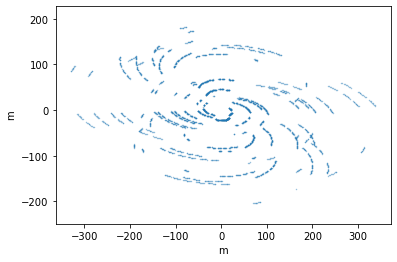

In [13]:
uvdata.plot_uvgrid()